(12, 25, 60)
(25, 60)


/var/folders/qt/6k9t6mfn12l30tsrj8hnl6wh0000gs/T/ipykernel_31238/1860445959.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  color_bar = plt.colorbar(scalar_mappable, label='Index')


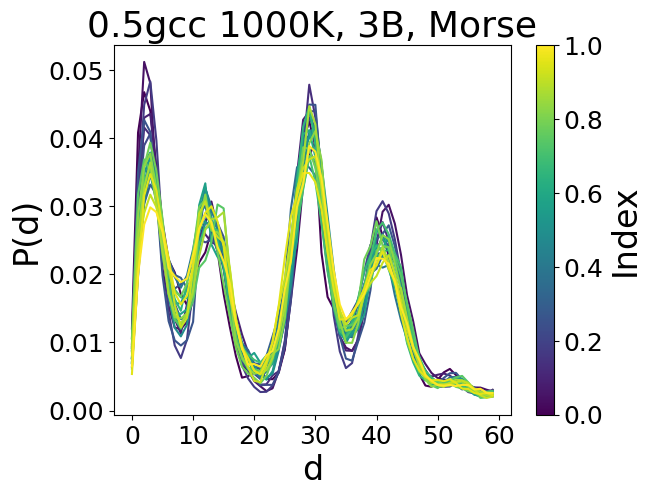

/var/folders/qt/6k9t6mfn12l30tsrj8hnl6wh0000gs/T/ipykernel_31238/1860445959.py:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  color_bar = plt.colorbar(scalar_mappable, label='Index')


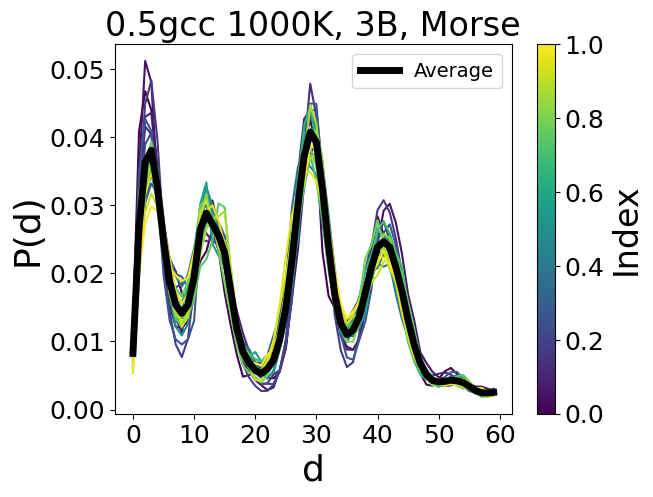

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

size = 24

with open("3b_all_pd", 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

print(np.shape(pd_3b))
print(np.shape(pd_3b[0]))
curves = pd_3b[2][1:] # Skip first frame
# Stack the curves into a single array
stacked_curves = np.stack(curves, axis=0)
# Calculate the mean along the first axis (assuming curves are in rows)
average_curve = np.mean(stacked_curves, axis=0)

# Define a color palette (you can use any color palette you like)
colors = plt.cm.viridis(np.linspace(0, 1, len(curves)))

for index, pd in enumerate(curves):
    plt.plot(pd, color=colors[index])

plt.ylabel("P(d)", fontsize=size+2)
plt.xlabel("d", fontsize=size+2)
plt.xticks(fontsize=size-6)
plt.yticks(fontsize=size-6)
plt.title("0.5gcc 1000K, 3B, Morse", fontsize=size+2)
# Create a ScalarMappable object and associate it with the viridis colormap
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
scalar_mappable.set_array(np.linspace(0, 1, len(curves)))  # Set the range of your data

# Add a color bar
color_bar = plt.colorbar(scalar_mappable, label='Index')

# Set the font size of the color bar label
color_bar.ax.yaxis.label.set_fontsize(size)
color_bar.ax.tick_params(labelsize=size-6)  # Change the font size to 12 points
plt.show()

for index, pd in enumerate(curves):
    plt.plot(pd, color=colors[index])

plt.plot(average_curve, color = "k",linewidth=5.0, label="Average")
plt.ylabel("P(d)", fontsize=size+2)
plt.xlabel("d", fontsize=size+2)
plt.title("0.5gcc 1000K, 3B, Morse", fontsize=size)
plt.legend(fontsize=size-10)
# Set tick label font sizes for both x and y axes
plt.xticks(fontsize=size-6)
plt.yticks(fontsize=size-6)
# Add a color bar
color_bar = plt.colorbar(scalar_mappable, label='Index')

# Set the font size of the color bar label
color_bar.ax.yaxis.label.set_fontsize(size)
color_bar.ax.tick_params(labelsize=size-6)  # Change the font size to 12 points

plt.show()

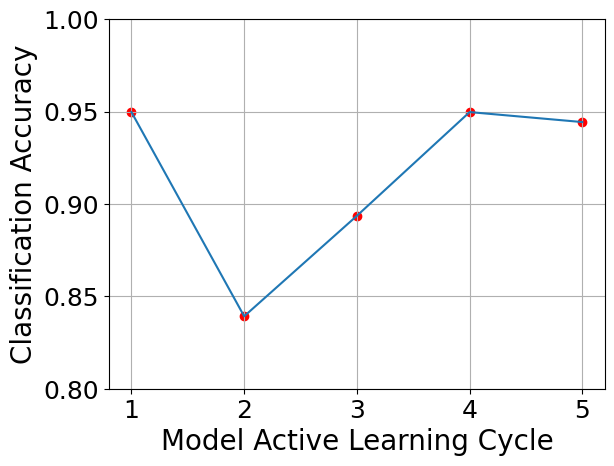

In [11]:
import matplotlib.pyplot as plt

data = [[1, 0.949697933227345],
[2, 0.8392050874403816],
[3, 0.8935771065182829],
[4, 0.949697933227345],
[5, 0.9442925278219395]]

# Extract x and y values
x_values = [point[0] for point in data]
y_values = [point[1] for point in data]

# Create scatter plot
plt.plot(x_values, y_values)
plt.scatter(x_values, y_values, c='r')

# Add labels and title
fs = 20
plt.xlabel('Model Active Learning Cycle', fontsize = fs)
plt.ylabel('Classification Accuracy', fontsize = fs)
plt.xticks([1, 2, 3, 4, 5], fontsize=fs-2)  # Example for x-axis
plt.yticks([0.8, 0.85, 0.9, 0.95, 1.0], fontsize=fs-2)  # Example for y-axis

# Show plot
plt.grid(True)
plt.show()

(12, 25, 60)
(12, 25, 60)
(12, 25, 60)
(25, 180)


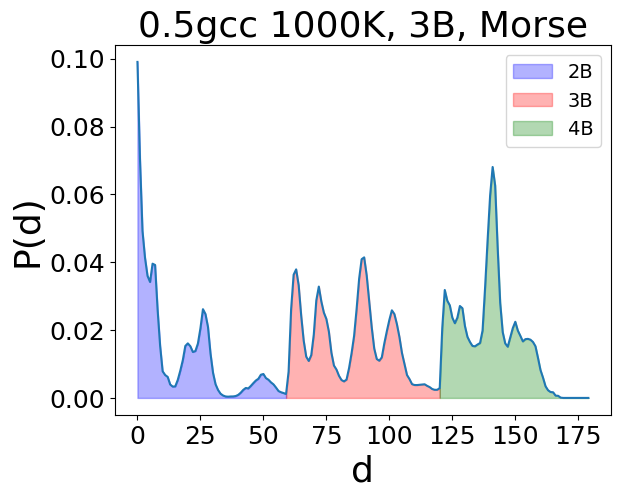

In [41]:
with open("2b_all_pd", 'rb') as pickle_file:
    pd_2b = pickle.load(pickle_file)

with open("3b_all_pd", 'rb') as pickle_file:
    pd_3b = pickle.load(pickle_file)

with open("4b_all_pd", 'rb') as pickle_file:
    pd_4b = pickle.load(pickle_file)

print(np.shape(pd_2b))
print(np.shape(pd_3b))
print(np.shape(pd_4b))

body_2 = pd_2b[2]
body_3 = pd_3b[2]
body_4 = pd_4b[2]

body_all = np.hstack((body_2, body_3, body_4))
print(np.shape(body_all))

plt.plot(body_all[12])

# Fill the area under the curve with blue for the first 60 indices
plt.fill_between(range(60), body_all[12][:60], color='blue', alpha=0.3, label = "2B")
plt.fill_between(range(59, 121), body_all[12][59:121], color='red', alpha=0.3, label = "3B")
plt.fill_between(range(120, 180), body_all[12][120:181], color='green', alpha=0.3, label = "4B")

# Add labels and title
plt.ylabel("P(d)", fontsize=size+2)
plt.xlabel("d", fontsize=size+2)
plt.xticks(fontsize=size-6)
plt.yticks(fontsize=size-6)
plt.title("0.5gcc 1000K, 3B, Morse", fontsize=size+2)

plt.legend(fontsize=size-10)

# Show the plot
plt.show()